# Time Series Modeling w/ SAAS Data

In [1]:
import numpy as np
import pandas as pd

from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

import statsmodels.api as sm
from statsmodels.tsa.api import Holt

import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare

In [2]:
saas = pd.read_csv('saas.csv')
saas.head()

,Month_Invoiced,Customer_Id,Invoice_Id,Subscription_Type,Amount
0,2014-01-31,1000000,5000000,0.0,0.0
1,2014-01-31,1000001,5000001,2.0,10.0
2,2014-01-31,1000002,5000002,0.0,0.0
3,2014-01-31,1000003,5000003,0.0,0.0
4,2014-01-31,1000004,5000004,1.0,5.0


In [3]:
saas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790458 entries, 0 to 790457
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Month_Invoiced     790458 non-null  object 
 1   Customer_Id        790458 non-null  int64  
 2   Invoice_Id         790458 non-null  int64  
 3   Subscription_Type  790458 non-null  float64
 4   Amount             790458 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 30.2+ MB


In [4]:
saas.Month_Invoiced = pd.to_datetime(saas.Month_Invoiced)
# make sure we sort by date/time before resampling or doing other time series manipulations
saas = saas.set_index('Month_Invoiced').sort_index()

In [5]:
saas.head()

,Customer_Id,Invoice_Id,Subscription_Type,Amount
Month_Invoiced,,,,
2014-01-31,1000000,5000000,0.0,0.0
2014-01-31,1000001,5000001,2.0,10.0
2014-01-31,1000002,5000002,0.0,0.0
2014-01-31,1000003,5000003,0.0,0.0
2014-01-31,1000004,5000004,1.0,5.0


In [6]:
saas = saas.resample('M').sum().drop(columns=['Customer_Id', 'Invoice_Id'])
saas.shape

(48, 2)

In [7]:
saas_train_size = int(len(saas) * .5)
saas_validate_size = int(len(saas) * .3)
saas_test_size = int(len(saas) - saas_train_size - saas_validate_size)
saas_validate_end_index = saas_train_size + saas_validate_size

In [8]:
# split into train, validation, test
saas_train = saas[: saas_train_size]
saas_validate = saas[saas_train_size : saas_validate_end_index]
saas_test = saas[saas_validate_end_index : ]

print(saas_train.shape, saas_validate.shape, saas_test.shape)

(24, 2) (14, 2) (10, 2)


In [9]:
saas_train

,Subscription_Type,Amount
Month_Invoiced,,
2014-01-31,7170.0,35850.0
2014-02-28,7438.0,37190.0
2014-03-31,7659.0,38295.0
2014-04-30,7851.0,39255.0
2014-05-31,8071.0,40355.0
2014-06-30,8251.0,41255.0
2014-07-31,8434.0,42170.0
2014-08-31,8642.0,43210.0
2014-09-30,8815.0,44075.0


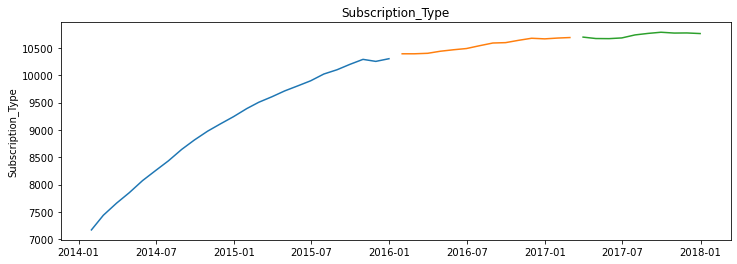

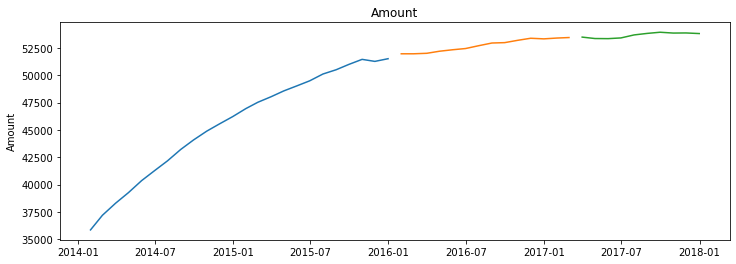

In [10]:
for col in saas_train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(saas_train[col])
    plt.plot(saas_validate[col])
    plt.plot(saas_test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [11]:
saas = pd.read_csv('saas.csv')
saas.Month_Invoiced = pd.to_datetime(saas.Month_Invoiced)
# make sure we sort by date/time before resampling or doing other time series manipulations
saas = saas.set_index('Month_Invoiced').sort_index()

In [12]:
saas = saas.resample('M').mean().drop(columns=['Customer_Id', 'Invoice_Id'])
saas.shape

(48, 2)

In [13]:
saas_train_size = int(len(saas) * .5)
saas_validate_size = int(len(saas) * .3)
saas_test_size = int(len(saas) - saas_train_size - saas_validate_size)
saas_validate_end_index = saas_train_size + saas_validate_size

In [14]:
# split into train, validation, test
saas_train = saas[: saas_train_size]
saas_validate = saas[saas_train_size : saas_validate_end_index]
saas_test = saas[saas_validate_end_index : ]

print(saas_train.shape, saas_validate.shape, saas_test.shape)

(24, 2) (14, 2) (10, 2)


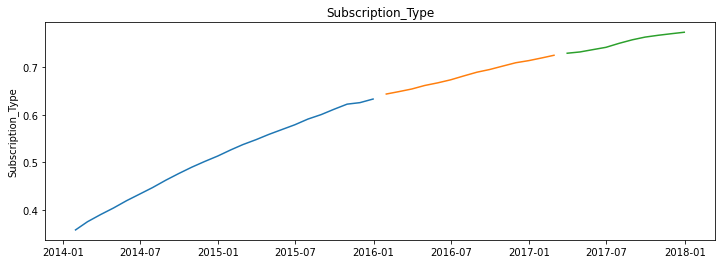

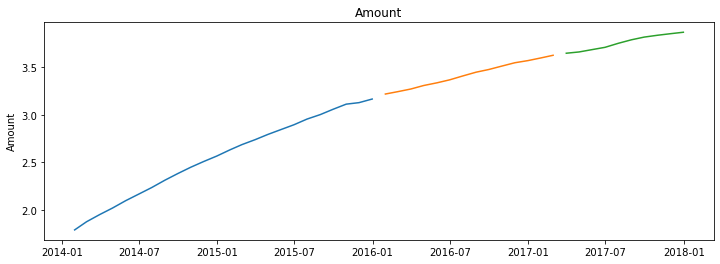

In [15]:
for col in saas_train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(saas_train[col])
    plt.plot(saas_validate[col])
    plt.plot(saas_test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [16]:
saas_train

,Subscription_Type,Amount
Month_Invoiced,,
2014-01-31,0.358500,1.792500
2014-02-28,0.375657,1.878283
2014-03-31,0.390785,1.953926
2014-04-30,0.404420,2.022099
2014-05-31,0.419905,2.099527
2014-06-30,0.433396,2.166982
2014-07-31,0.447403,2.237017
2014-08-31,0.462832,2.314160
2014-09-30,0.476641,2.383205
